# Exploratory Data Analysis of Coin Market Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Copy some random coin


In [2]:
# where the mine data is stored
FOLDER = '../01.Original_data/2020-06-27.cmp/'

In [3]:
files = [f"{FOLDER}{f}" for f in os.listdir(FOLDER) if f.endswith('csv')]

In [19]:
data = pd.read_csv(f"{FOLDER}XRP__XRP.csv", index_col=0)
data.head()

,Date,Open,High,Low,Close,Volume,Market_cap
0,"Jun 25, 2020","0,184076","0,184982","0,180956","0,183570",1.055.030.012,8.124.389.491
1,"Jun 24, 2020","0,188700","0,190857","0,183050","0,184272",1.138.044.691,8.155.465.082
2,"Jun 23, 2020","0,189295","0,189973","0,187062","0,188680",1.093.605.185,8.350.557.840
3,"Jun 22, 2020","0,185665","0,190080","0,185594","0,189272",1.209.278.721,8.376.771.498
4,"Jun 21, 2020","0,188468","0,189103","0,185501","0,185610",893.641.269,8.214.686.195


In [20]:
data.tail()

,Date,Open,High,Low,Close,Volume,Market_cap
2513,"Aug 08, 2013","0,004397","0,004424","0,004175","0,004254",0,33.258.632
2514,"Aug 07, 2013","0,004669","0,004682","0,004333","0,004417",0,34.534.121
2515,"Aug 06, 2013","0,005637","0,005661","0,004629","0,004680",0,36.591.008
2516,"Aug 05, 2013","0,005875","0,005980","0,005613","0,005613",0,43.879.157
2517,"Aug 04, 2013","0,005874","0,005927","0,005874","0,005882",0,45.983.577


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2518 entries, 0 to 2517
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        2518 non-null   object
 1   Open        2518 non-null   object
 2   High        2518 non-null   object
 3   Low         2518 non-null   object
 4   Close       2518 non-null   object
 5   Volume      2518 non-null   object
 6   Market_cap  2518 non-null   object
dtypes: object(7)
memory usage: 157.4+ KB


## Data cleaning


### Date

In [22]:
data['date'] = pd.to_datetime(data['Date'])
data.sample(10)

,Date,Open,High,Low,Close,Volume,Market_cap,date
1491,"May 26, 2016","0,005757","0,005757","0,005641","0,005669",678.744,197.668.452,2016-05-26
2503,"Aug 18, 2013","0,005687","0,006263","0,005585","0,005617",0,43.916.527,2013-08-18
732,"Jun 24, 2018","0,491773","0,493725","0,450048","0,477380",369.520.000,18.734.923.547,2018-06-24
906,"Jan 01, 2018","2,30","2,39","2,15","2,39",1.894.230.016,92.626.457.504,2018-01-01
987,"Oct 12, 2017","0,265046","0,267468","0,248414","0,248414",245.004.000,9.588.892.546,2017-10-12
2355,"Jan 13, 2014","0,021961","0,021992","0,020657","0,021664","15.328,00",169.369.892,2014-01-13
303,"Aug 27, 2019","0,270899","0,271042","0,266216","0,269618",1.028.940.804,11.575.485.111,2019-08-27
2475,"Sep 15, 2013","0,006349","0,006516","0,006349","0,006472",0,50.595.585,2013-09-15
1995,"Jan 08, 2015","0,020843","0,020917","0,020668","0,020676",823.446,640.502.683,2015-01-08
468,"Mar 15, 2019","0,312733","0,316065","0,311575","0,315052",636.037.517,13.053.269.086,2019-03-15


### Numeric columns

In [23]:
cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Market_cap']
def clean_numeric_columns(row, col):
    """
    Cleans the numeric columns given as a str col. 
    Points are replaced with nothing and commas are replaced with decimal points.
    """
    # replace point
    entry = row[col].replace('.', '')
    # replace comma
    entry = entry.replace(',', '.')
    # conver to float
    entry = np.float(entry)
    
    return entry

for col in cols:
    new_col = col.lower()
    data[new_col] = data.apply(lambda x: clean_numeric_columns(x, col), axis=1)
    

In [24]:
# check random 20 columns if all went well
data.sample(10)

,Date,Open,High,Low,Close,Volume,Market_cap,date,open,high,low,close,volume,market_cap
1895,"Apr 18, 2015","0,008042","0,008044","0,007898","0,007900",184.595,252.075.643,2015-04-18,0.008042,0.008044,0.007898,0.007900,1.845950e+05,2.520756e+08
1001,"Sep 28, 2017","0,202532","0,203271","0,191344","0,196131",117.962.000,7.520.416.052,2017-09-28,0.202532,0.203271,0.191344,0.196131,1.179620e+08,7.520416e+09
1696,"Nov 03, 2015","0,005160","0,005546","0,005128","0,005383",1.030.430,178.480.219,2015-11-03,0.005160,0.005546,0.005128,0.005383,1.030430e+06,1.784802e+08
759,"May 28, 2018","0,608368","0,609781","0,552299","0,552299",327.903.008,21.644.580.268,2018-05-28,0.608368,0.609781,0.552299,0.552299,3.279030e+08,2.164458e+10
1150,"May 02, 2017","0,054646","0,055639","0,050710","0,053908",33.814.700,2.042.306.875,2017-05-02,0.054646,0.055639,0.050710,0.053908,3.381470e+07,2.042307e+09
388,"Jun 03, 2019","0,444674","0,459579","0,424949","0,425764",2.544.969.218,17.959.558.304,2019-06-03,0.444674,0.459579,0.424949,0.425764,2.544969e+09,1.795956e+10
161,"Jan 16, 2020","0,232881","0,233568","0,224055","0,228574",2.066.952.513,9.978.103.123,2020-01-16,0.232881,0.233568,0.224055,0.228574,2.066953e+09,9.978103e+09
1910,"Apr 03, 2015","0,007905","0,008722","0,007904","0,008720",1.010.690,278.250.547,2015-04-03,0.007905,0.008722,0.007904,0.008720,1.010690e+06,2.782505e+08
1246,"Jan 26, 2017","0,006511","0,007073","0,006425","0,006690",1.446.950,246.557.247,2017-01-26,0.006511,0.007073,0.006425,0.006690,1.446950e+06,2.465572e+08
1672,"Nov 27, 2015","0,004276","0,004304","0,004229","0,004276",199.790,141.779.277,2015-11-27,0.004276,0.004304,0.004229,0.004276,1.997900e+05,1.417793e+08


### Drop uncleaned cols

In [25]:
cols.append('Date')
data_cleaned = data.drop(columns=cols)
data_cleaned

,date,open,high,low,close,volume,market_cap
0,2020-06-25,0.184076,0.184982,0.180956,0.183570,1.055030e+09,8.124389e+09
1,2020-06-24,0.188700,0.190857,0.183050,0.184272,1.138045e+09,8.155465e+09
2,2020-06-23,0.189295,0.189973,0.187062,0.188680,1.093605e+09,8.350558e+09
3,2020-06-22,0.185665,0.190080,0.185594,0.189272,1.209279e+09,8.376771e+09
4,2020-06-21,0.188468,0.189103,0.185501,0.185610,8.936413e+08,8.214686e+09
...,...,...,...,...,...,...,...
2513,2013-08-08,0.004397,0.004424,0.004175,0.004254,0.000000e+00,3.325863e+07
2514,2013-08-07,0.004669,0.004682,0.004333,0.004417,0.000000e+00,3.453412e+07
2515,2013-08-06,0.005637,0.005661,0.004629,0.004680,0.000000e+00,3.659101e+07
2516,2013-08-05,0.005875,0.005980,0.005613,0.005613,0.000000e+00,4.387916e+07


In [26]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2518 entries, 0 to 2517
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        2518 non-null   datetime64[ns]
 1   open        2518 non-null   float64       
 2   high        2518 non-null   float64       
 3   low         2518 non-null   float64       
 4   close       2518 non-null   float64       
 5   volume      2518 non-null   float64       
 6   market_cap  2518 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 157.4 KB


## Plots

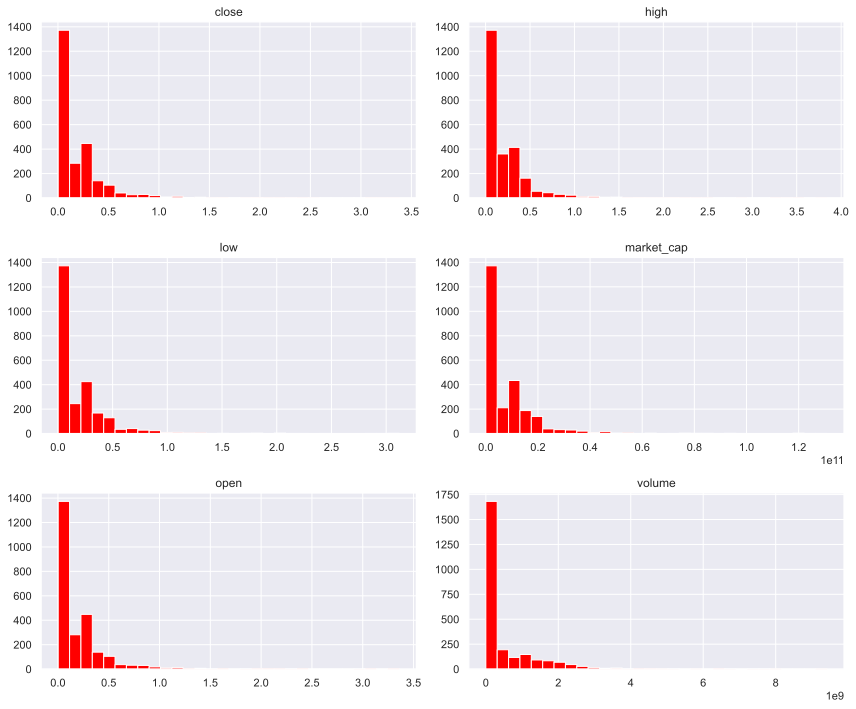

In [27]:
data_cleaned.hist(bins=30, color='red', figsize=(12,10))
plt.tight_layout()
plt.show()

### high, low, and average

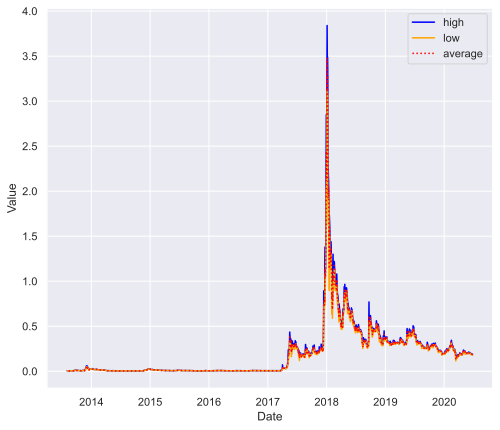

In [28]:
fig, ax = plt.subplots(figsize=(8, 7))
sns.set()
data_cleaned['average'] = (data_cleaned['high']+data_cleaned['low']) / 2
cols = ['high', 'low', 'average']
colors = ['blue', 'orange', 'red']
style = ['-', '-', ':']
for c, color, ls in zip(cols, colors, style):
    plt.plot(data_cleaned['date'], data_cleaned[c], color=color, label=c, ls=ls)
plt.legend()
plt.ylabel('Value')
plt.xlabel('Date')
plt.show()

### market_cap and volume

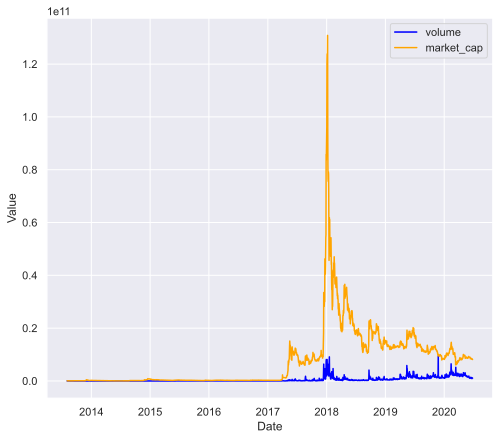

In [29]:
fig, ax = plt.subplots(figsize=(8, 7))
sns.set()
cols = ['volume', 'market_cap']
colors = ['blue', 'orange', 'red']
style = ['-', '-', ':']
for c, color, ls in zip(cols, colors, style):
    plt.plot(data_cleaned['date'], data_cleaned[c], color=color, label=c, ls=ls)
plt.legend()
plt.ylabel('Value')
plt.xlabel('Date')
plt.show()

# Make one function for the data cleaning



In [30]:
def clean_raw_cmp_data(dataset):
    """
    Takes in a dataset that was mined from coinmarketcap and returns a cleaned version.
    """
    
    cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Market_cap']
    
    def clean_numeric_columns(row, col):
        """
        Cleans the numeric columns given as a str col. 
        Points are replaced with nothing and commas are replaced with decimal points.
        """
        # replace point
        entry = row[col].replace('.', '')
        # replace comma
        entry = entry.replace(',', '.')
        # conver to float
        entry = np.float(entry)

        return entry

    for col in cols:
        new_col = col.lower()
        dataset[new_col] = dataset.apply(lambda x: clean_numeric_columns(x, col), axis=1)
        
    data['date'] = pd.to_datetime(data['Date'])
    
    cols.append('Date')
    dataset = dataset.drop(columns=cols)
    
    dataset['average'] = (dataset['high']+dataset['low']) / 2
    
    return dataset

In [31]:
data_cleaned = clean_raw_cmp_data(data)